In [ ]:
!pip install -U hopsworks --quiet

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import hopsworks

## DATA EXPLORATION

In [2]:
# Importing the CSV file 

df = pd.read_csv("titles.csv")
df.head(4)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811


In [3]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


In [4]:
#Getting the information regarding our datset to know how much null values are there..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
df.shape

(5850, 15)

In [6]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

## Feature Engineering

In [8]:
# Dropping the unnecessary columns 

df=df.drop(["description","imdb_id"],axis=1)
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0,20.398,7.600


In [9]:
# AS here we got to know that there are too many unique values for the release_year column so we will be shortening it

df["release_year"].unique()

array([1945, 1976, 1972, 1975, 1967, 1969, 1979, 1971, 1980, 1961, 1966,
       1954, 1958, 1977, 1963, 1956, 1960, 1973, 1974, 1959, 1978, 1989,
       1990, 1987, 1984, 1983, 1982, 1986, 1981, 1988, 1985, 2000, 1996,
       1997, 1995, 1994, 1999, 1998, 1993, 1992, 1991, 2008, 2002, 2010,
       2005, 2007, 2004, 2006, 2009, 2003, 2001, 2011, 2012, 2013, 2014,
       2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021])

In [10]:
#Cleaning our "Year" column as there are too much unique values 
# We will be making a new variable which will be conataining years that have less than 100 movie/show relaesed 
# and we noticed that these all were before 2012

year=df["release_year"].value_counts()
yearless100=year[year<100]

def handle_year(value):
    if value in yearless100:
        return "Before 2012"
    else:
        return value
df["release_year"]=df["release_year"].apply(handle_year)
df["release_year"].value_counts()

2019           836
2020           814
2021           787
2018           773
Before 2012    726
2017           563
2022           371
2016           362
2015           223
2014           153
2013           135
2012           107
Name: release_year, dtype: int64

In [11]:
#Renaming ourn Column because it's name is too long to type again and again

df=df.rename(columns={"age_certification":"age"})

In [12]:
#Replacing the null values in Age Restriction column with "Not Rated " as we cant drop this much of data

df["age"].unique()
df["age"].isnull().sum()

df["age"]=df["age"].fillna("Not Rated")
df["age"].unique()

array(['TV-MA', 'R', 'PG', 'Not Rated', 'TV-14', 'PG-13', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'G', 'NC-17'], dtype=object)

In [13]:
'''Replacing null values in Seasons column with "0" as mainly movies have null values and we know movies 
dont have any seasons so we will replace it with "0" instead of dropping them as we cant drop this much of 
data as movie occupies more than half of data'''


df["seasons"].isnull().sum()
df["seasons"].unique()

df["seasons"]=df["seasons"].fillna(0)
df["seasons"].unique()

array([ 1.,  0.,  4.,  9., 24.,  5., 39., 10., 13., 42., 25., 21., 37.,
        8., 29.,  7., 11., 14., 12.,  6., 32., 15., 19.,  2., 20.,  3.,
       16.])

In [14]:
'''Title column have only one null value so we can drop that data '''

df = df[~df["title"].isnull()]
df["title"].isnull().sum()

0

In [15]:
'''Replacing null values in below three columns with their mean values'''
# We can do that seperately also but to save our time we did this ...!

three_col=df[["imdb_score","tmdb_popularity","tmdb_score"]]
df[["imdb_score","tmdb_popularity","tmdb_score"]]=three_col.apply(lambda x : x.fillna(np.mean(x)))
df["imdb_votes"].isnull().sum()

497

In [16]:
# Replacing the null values in IMDB votes column with "Not voted" as here we can't do mean and other
# arthimetic operations as giving a movie voting cant be decided by votes of other movies

df["imdb_votes"].value_counts()
df["imdb_votes"].fillna("Not Voted",inplace=True)
df["imdb_votes"].isnull().sum()

See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


0

In [17]:
#DONE we have cleaned our data there are no null values in our data 
#                      Bingoooo  !!!!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   object 
 4   age                   5849 non-null   object 
 5   runtime               5849 non-null   int64  
 6   genres                5849 non-null   object 
 7   production_countries  5849 non-null   object 
 8   seasons               5849 non-null   float64
 9   imdb_score            5849 non-null   float64
 10  imdb_votes            5849 non-null   object 
 11  tmdb_popularity       5849 non-null   float64
 12  tmdb_score            5849 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 639.7+ KB


In [18]:
df.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age                     0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [19]:
df["id"] = df.id.astype(str)
df["title"] = df.title.astype(str)
df["type"] = df.type.astype(str)
df["release_year"] = df.release_year.astype(str)
df["age"] = df.age.astype(str)
df["runtime"] = df.runtime.astype(int) 
df["genres"] = df.genres.astype(str)
df["production_countries"] = df.production_countries.astype(str)
df["seasons"] = df.seasons.astype(float)
df["imdb_score"] = df.imdb_score.astype(float)
df["imdb_votes"] = df.imdb_votes.astype(str)
df["tmdb_popularity"] = df.tmdb_popularity.astype(float) 
df["tmdb_score"] = df.tmdb_score.astype(float) 

## Creating Feature Groups

In [20]:
# Before you can create a feature group you need to connect to Hopsworks feature store.

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/58521
Connected. Call `.close()` to terminate connection gracefully.


In [123]:
# To create a feature group you need to give it a name and specify a primary key. 
# It is also good to provide a description of the contents of the feature group.

Imdb_data_fg = fs.create_feature_group(
    name="imdb_data_feature",
    version=1,
    description="This contains the features for the IMDb data",
    primary_key=['title'],
)

In [124]:
Imdb_data_fg.insert(df, write_options={"wait_for_job": False})

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/58521/fs/57417/fg/74177


Uploading Dataframe: 0.00% |          | Rows 0/5849 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: imdb_data_feature_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/58521/jobs/named/imdb_data_feature_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x12a7cc550>, None)

In [117]:
feature_descriptions = [
    {"name": "title", "description": "Movie title"}, 
    {"name": "type", "description": "Type of the movie"}, 
    {"name": "release_year", "description": "The year when the movie was released"}, 
    {"name": "age", "description": "This is the age range for the people who can watch the movie"}, 
    {"name": "runtime", "description": "Total time to watch the entire movie"}, 
    {"name": "genres", "description": "Categories that define the movie"}, 
    {"name": "production_countries", "description": "Countries where the movie was filmed"},
    {"name": "seasons", "description": "Describes how many seasons the movie has"}, 
    {"name": "imdb_score", "description": "Describes the rating score on the movie on IMBd"}, 
    {"name": "imdb_votes", "description": "Votes of the IMBd registered users about the movie"}, 
    {"name": "tmdb_popularity", "description": "Describes the popularity of the movie on The Movie Database"}, 
    {"name": "tmdb_score", "description": "Describes the popularity score of the movie on The Movie Database"}, 
]

for desc in feature_descriptions: 
    imdb_data_fg.update_feature_description(desc["name"], desc["description"])

In [21]:
# Retreve data from the feature group
fg = fs.get_feature_group(
        name="imdb_data_feature",
        version=1,
    )

In [22]:
fg.name

'imdb_data_feature'

In [27]:
fg.description

'This contains the features for the IMDb data'

In [49]:
fg.primary_key

['title']

In [28]:
fg.seasons

Feature('seasons', 'double', None, False, False, None, None, 74177)

In [50]:
fg.title

Feature('title', 'string', None, True, False, None, None, 74177)

In [29]:
fg.select_all().read()

2023-07-06 13:24:46,511 INFO: USE `unicorn_featurestore`
2023-07-06 13:24:47,287 INFO: SELECT `fg0`.`id` `id`, `fg0`.`title` `title`, `fg0`.`type` `type`, `fg0`.`release_year` `release_year`, `fg0`.`age` `age`, `fg0`.`runtime` `runtime`, `fg0`.`genres` `genres`, `fg0`.`production_countries` `production_countries`, `fg0`.`seasons` `seasons`, `fg0`.`imdb_score` `imdb_score`, `fg0`.`imdb_votes` `imdb_votes`, `fg0`.`tmdb_popularity` `tmdb_popularity`, `fg0`.`tmdb_score` `tmdb_score`
FROM `unicorn_featurestore`.`imdb_data_feature_1` `fg0`


,id,title,type,release_year,age,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm35463,Blow,MOVIE,Before 2012,R,124,"['crime', 'drama']",['US'],0.0,7.500000,258431.0,24.348,7.400
1,ts55982,Anne with an E,SHOW,2017,TV-G,46,"['drama', 'family']",['CA'],3.0,8.700000,52756.0,150.370,8.800
2,tm203186,Children of Shatila,MOVIE,Before 2012,Not Rated,50,"['documentation', 'history']",['LB'],0.0,8.100000,78.0,1.635,6.700
3,tm441198,The Princess Switch,MOVIE,2018,PG,101,"['romance', 'drama', 'family', 'comedy']",['US'],0.0,6.000000,27852.0,24.268,7.037
4,tm983849,Vir Das: Outside in - The Lockdown Special,MOVIE,2020,Not Rated,50,['comedy'],[],0.0,6.400000,269.0,3.077,6.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,tm239676,Hush,MOVIE,2016,R,82,"['horror', 'thriller']",['US'],0.0,6.600000,123667.0,20.608,6.700
5794,ts85170,Memories of the Alhambra,SHOW,2018,TV-MA,65,"['scifi', 'drama', 'action', 'thriller', 'roma...",['KR'],1.0,7.800000,5537.0,12.047,7.900
5795,ts82085,Ainori Love Wagon: Asian Journey,SHOW,2017,Not Rated,30,['reality'],['JP'],2.0,6.800000,276.0,5.356,7.400
5796,tm325102,Puss in Book: Trapped in an Epic Tale,MOVIE,2017,G,23,"['comedy', 'action', 'family', 'fantasy', 'ani...",['US'],0.0,6.510861,Not Voted,26.998,6.500


In [33]:
fg.read()

2023-07-06 13:26:07,064 INFO: USE `unicorn_featurestore`
2023-07-06 13:26:07,915 INFO: SELECT `fg0`.`id` `id`, `fg0`.`title` `title`, `fg0`.`type` `type`, `fg0`.`release_year` `release_year`, `fg0`.`age` `age`, `fg0`.`runtime` `runtime`, `fg0`.`genres` `genres`, `fg0`.`production_countries` `production_countries`, `fg0`.`seasons` `seasons`, `fg0`.`imdb_score` `imdb_score`, `fg0`.`imdb_votes` `imdb_votes`, `fg0`.`tmdb_popularity` `tmdb_popularity`, `fg0`.`tmdb_score` `tmdb_score`
FROM `unicorn_featurestore`.`imdb_data_feature_1` `fg0`


,id,title,type,release_year,age,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm35463,Blow,MOVIE,Before 2012,R,124,"['crime', 'drama']",['US'],0.0,7.500000,258431.0,24.348,7.400
1,ts55982,Anne with an E,SHOW,2017,TV-G,46,"['drama', 'family']",['CA'],3.0,8.700000,52756.0,150.370,8.800
2,tm203186,Children of Shatila,MOVIE,Before 2012,Not Rated,50,"['documentation', 'history']",['LB'],0.0,8.100000,78.0,1.635,6.700
3,tm441198,The Princess Switch,MOVIE,2018,PG,101,"['romance', 'drama', 'family', 'comedy']",['US'],0.0,6.000000,27852.0,24.268,7.037
4,tm983849,Vir Das: Outside in - The Lockdown Special,MOVIE,2020,Not Rated,50,['comedy'],[],0.0,6.400000,269.0,3.077,6.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,tm239676,Hush,MOVIE,2016,R,82,"['horror', 'thriller']",['US'],0.0,6.600000,123667.0,20.608,6.700
5794,ts85170,Memories of the Alhambra,SHOW,2018,TV-MA,65,"['scifi', 'drama', 'action', 'thriller', 'roma...",['KR'],1.0,7.800000,5537.0,12.047,7.900
5795,ts82085,Ainori Love Wagon: Asian Journey,SHOW,2017,Not Rated,30,['reality'],['JP'],2.0,6.800000,276.0,5.356,7.400
5796,tm325102,Puss in Book: Trapped in an Epic Tale,MOVIE,2017,G,23,"['comedy', 'action', 'family', 'fantasy', 'ani...",['US'],0.0,6.510861,Not Voted,26.998,6.500


In [23]:
fg.show(4)

2023-07-07 12:33:32,473 INFO: USE `unicorn_featurestore`
2023-07-07 12:33:33,308 INFO: SELECT `fg0`.`id` `id`, `fg0`.`title` `title`, `fg0`.`type` `type`, `fg0`.`release_year` `release_year`, `fg0`.`age` `age`, `fg0`.`runtime` `runtime`, `fg0`.`genres` `genres`, `fg0`.`production_countries` `production_countries`, `fg0`.`seasons` `seasons`, `fg0`.`imdb_score` `imdb_score`, `fg0`.`imdb_votes` `imdb_votes`, `fg0`.`tmdb_popularity` `tmdb_popularity`, `fg0`.`tmdb_score` `tmdb_score`
FROM `unicorn_featurestore`.`imdb_data_feature_1` `fg0`


,id,title,type,release_year,age,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm35463,Blow,MOVIE,Before 2012,R,124,"['crime', 'drama']",['US'],0.0,7.5,258431.0,24.348,7.400
1,ts55982,Anne with an E,SHOW,2017,TV-G,46,"['drama', 'family']",['CA'],3.0,8.7,52756.0,150.370,8.800
2,tm203186,Children of Shatila,MOVIE,Before 2012,Not Rated,50,"['documentation', 'history']",['LB'],0.0,8.1,78.0,1.635,6.700
3,tm441198,The Princess Switch,MOVIE,2018,PG,101,"['romance', 'drama', 'family', 'comedy']",['US'],0.0,6.0,27852.0,24.268,7.037


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='type', ylabel='count'>

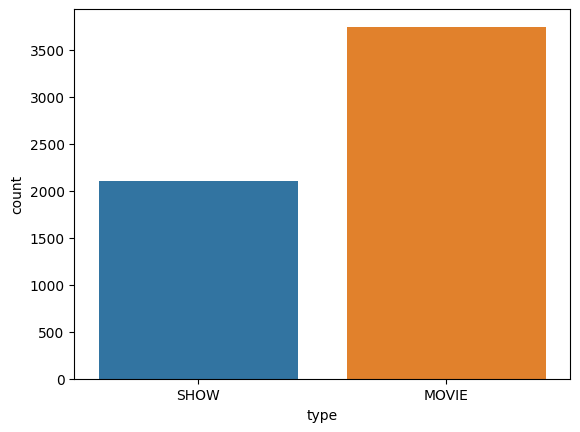

In [25]:
sns.countplot(x='type',data=df)

<Axes: xlabel='type', ylabel='imdb_score'>

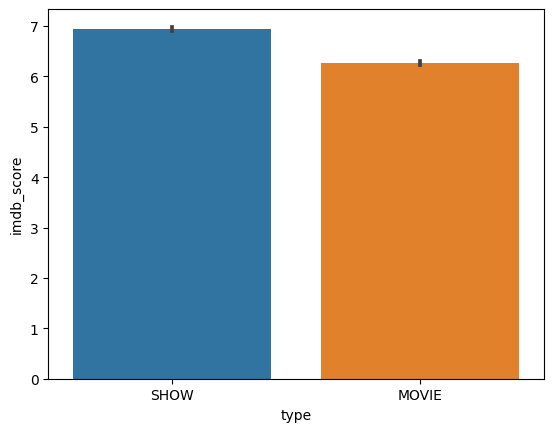

In [26]:
sns.barplot(x="type",y="imdb_score",data=df)

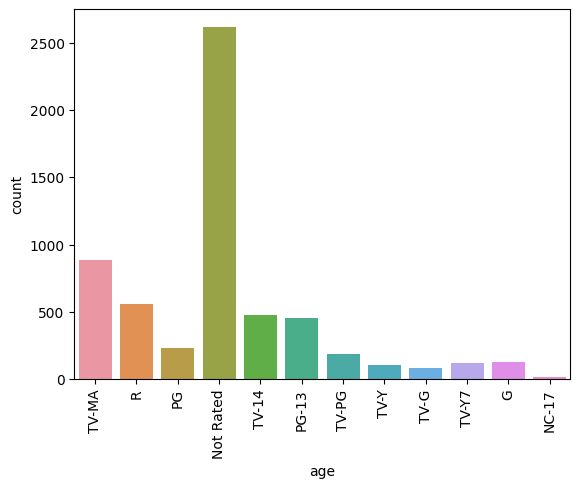

In [27]:
sns.countplot(x="age",data=df)
plt.xticks(rotation=90)
plt.show()

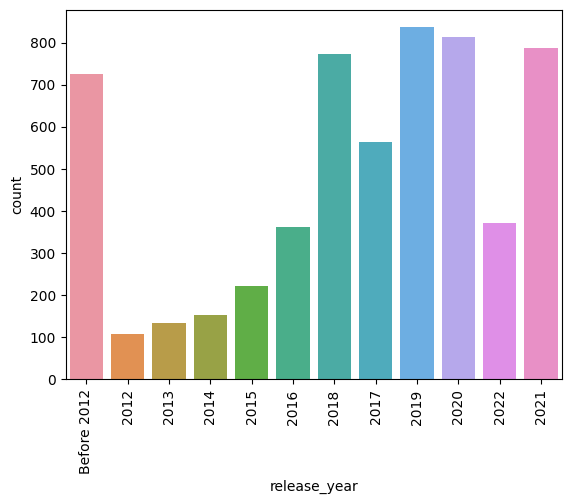

In [28]:
sns.countplot(x="release_year",data=df)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Let's filter the feature group and then use filtered data to build plots. 
# For example you can filter your FG to have only movies and shows with release_year >= 2015 and then use this retrieved data to build plots


df_filtered_year = fg.filter(fg.release_year >= 2016).read()

2023-07-07 12:37:15,554 INFO: USE `unicorn_featurestore`
2023-07-07 12:37:16,369 INFO: SELECT `fg0`.`id` `id`, `fg0`.`title` `title`, `fg0`.`type` `type`, `fg0`.`release_year` `release_year`, `fg0`.`age` `age`, `fg0`.`runtime` `runtime`, `fg0`.`genres` `genres`, `fg0`.`production_countries` `production_countries`, `fg0`.`seasons` `seasons`, `fg0`.`imdb_score` `imdb_score`, `fg0`.`imdb_votes` `imdb_votes`, `fg0`.`tmdb_popularity` `tmdb_popularity`, `fg0`.`tmdb_score` `tmdb_score`
FROM `unicorn_featurestore`.`imdb_data_feature_1` `fg0`
WHERE `fg0`.`release_year` >= '2016'


<Axes: xlabel='type', ylabel='count'>

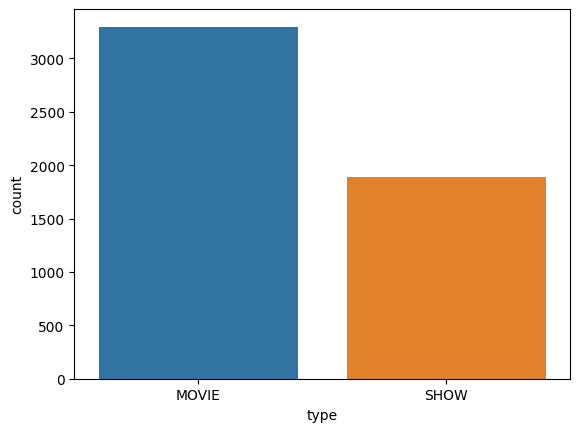

In [45]:
sns.countplot(x='type',data=df_filtered_year)

<Axes: xlabel='release_year', ylabel='count'>

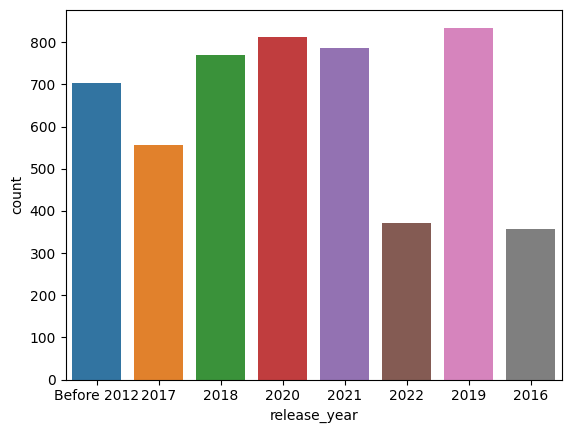

In [46]:
sns.countplot(x="release_year",data=df_filtered_year)